Kaggle Competition - Give Me Some Credit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
#import graphviz
from sklearn import preprocessing,model_selection
import itertools



In [2]:
fileaddress = 'D:/csdn/credit/givemesomecredit/data'
train_df = pd.read_csv(fileaddress+'/cs-training.csv')
test_df = pd.read_csv(fileaddress+'/cs-test.csv')
print ("training dataset shape is {}".format(train_df.shape))
print ("testing dataset shape is {}".format(test_df.shape))

training dataset shape is (150000, 12)
testing dataset shape is (101503, 12)


In [3]:
col_names = train_df.columns.values
col_names[0] = 'ID' ## rename first column to ID
train_df.columns = col_names ## assign new column name to training dataset
test_df.columns = col_names ## assign new column name to testing dataset


In [4]:
print ("Take a peek at training dataset")
train_df.head()

Take a peek at training dataset


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
print ("Take a peek at testing dataset")
test_df.head()

Take a peek at testing dataset


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
print(train_df.dtypes)

ID                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [7]:
print(test_df.dtypes)

ID                                        int64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


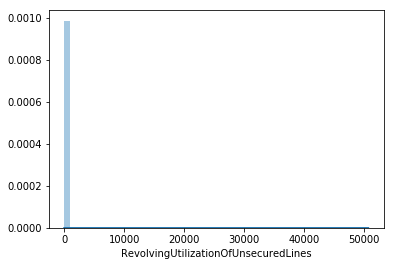

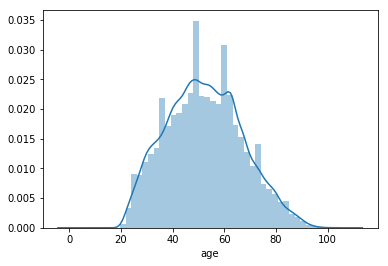

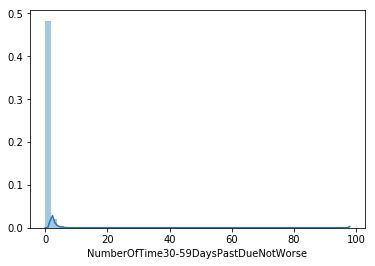

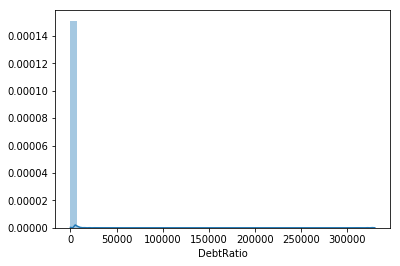

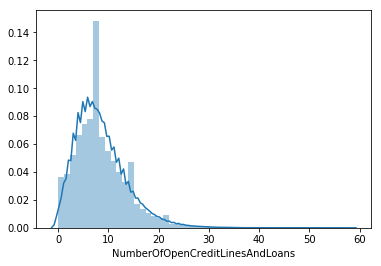

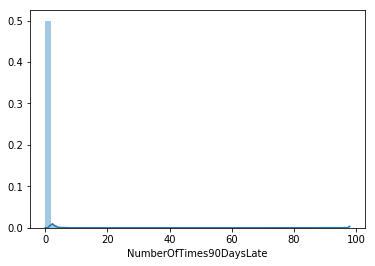

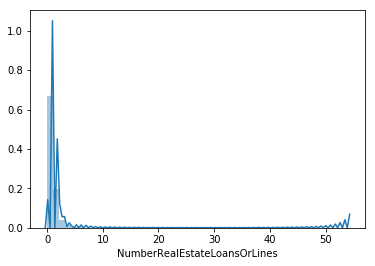

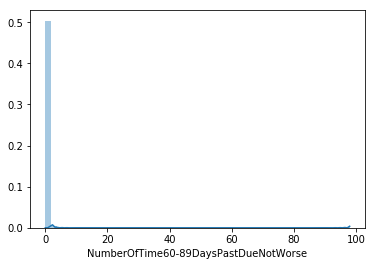

In [8]:
# remove ID, target variable Dlqin2yrs and variables with missing values
feature_list=list(train_df.columns.values)
remove_list = ['ID','SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

In [9]:
print (train_df.columns.values)

['ID' 'SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


In [10]:

log_trans_list = train_df.columns.values[[2,4,5,8,9,10]]
log_trans_list
for each in log_trans_list:
    train_df[each] = np.log(1+train_df[each].values)

Distribution after log transformation

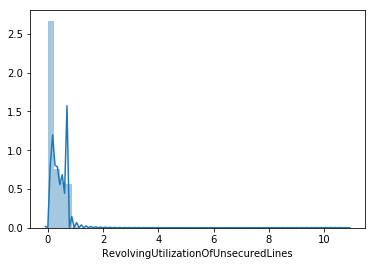

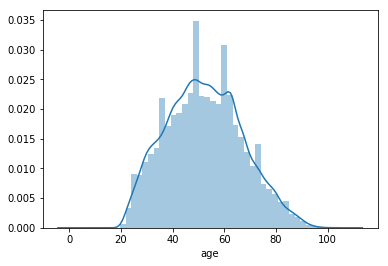

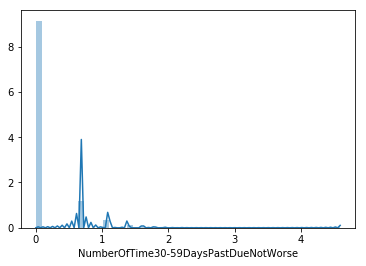

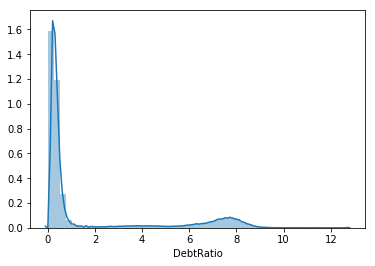

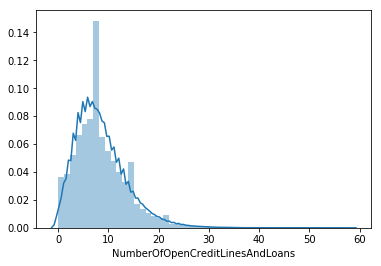

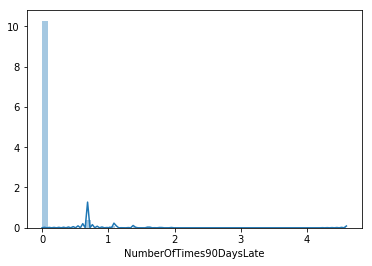

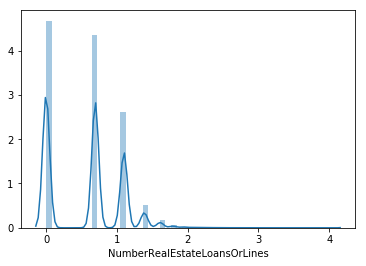

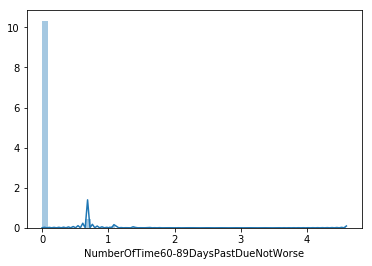

In [11]:
for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

The distribution after transformation is much less skewed. We may able to put them into machine learning algorithm later.

Remove nan values in "MonthlyIncome" and "NumberOfDependents" to check their distribution

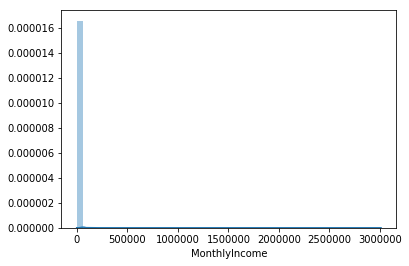

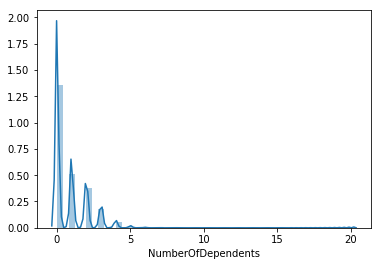

In [12]:
partial_train_df = train_df[['MonthlyIncome','NumberOfDependents']]
#partial_train_df.dropna(how='any')
partial_train_df = partial_train_df.dropna(how='any')

sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

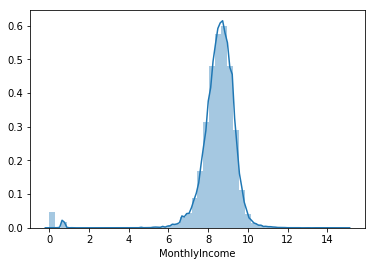

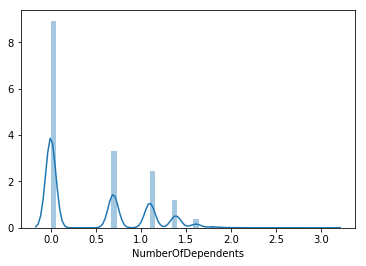

In [13]:
partial_train_df['MonthlyIncome'] = np.log(1+partial_train_df['MonthlyIncome'].values)
partial_train_df['NumberOfDependents'] = np.log(1+partial_train_df['NumberOfDependents'].values)
sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

In [14]:
train_df['MonthlyIncome'] = np.log(1+train_df['MonthlyIncome'].values)
train_df['NumberOfDependents'] = np.log(1+train_df['NumberOfDependents'].values)

In [15]:
print (pd.isnull(train_df).sum(axis=0))

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


Check nan values in testing set

In [16]:
print (pd.isnull(test_df).sum(axis=0))

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


In [17]:
train_df['MonthlyIncome_Null'] = pd.isnull(train_df['MonthlyIncome'])
grouped_df = train_df.groupby('MonthlyIncome_Null')
Dlqin = grouped_df['SeriousDlqin2yrs'].aggregate(np.mean).reset_index()
Dlqin

,MonthlyIncome_Null,SeriousDlqin2yrs
0,False,0.069486
1,True,0.056137


In [18]:
train_df['NoD_Null'] = pd.isnull(train_df['NumberOfDependents'])
grouped_df = train_df.groupby('NoD_Null')
Dlqin = grouped_df['SeriousDlqin2yrs'].aggregate(np.mean).reset_index()
Dlqin

,NoD_Null,SeriousDlqin2yrs
0,False,0.067410
1,True,0.045617


In [19]:
print(train_df.shape,type(train_df))
train_df.dropna(axis=0,how='any',subset=['NumberOfDependents'],inplace=True)
train_df.reset_index()
print(train_df.shape)
pd.isnull(train_df).sum(axis=0)

(150000, 14) <class 'pandas.core.frame.DataFrame'>
(146076, 14)


ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25807
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
MonthlyIncome_Null                          0
NoD_Null                                    0
dtype: int64

Simple way to get some new features

In [20]:
#print(set(train_df['NumberOfDependents']))
#print(set(train_df['NumberOfDependents']+1))

train_df['IncomePerPerson'] = train_df['MonthlyIncome']/(train_df['NumberOfDependents']+1)
test_df['IncomePerPerson'] = test_df['MonthlyIncome']/(test_df['NumberOfDependents']+1)
train_df['NumOfPastDue'] = train_df['NumberOfTimes90DaysLate']+train_df['NumberOfTime60-89DaysPastDueNotWorse'] +train_df['NumberOfTime30-59DaysPastDueNotWorse']
test_df['NumOfPastDue'] = test_df['NumberOfTimes90DaysLate']+test_df['NumberOfTime60-89DaysPastDueNotWorse'] +test_df['NumberOfTime30-59DaysPastDueNotWorse']
train_df['MonthlyDebt'] = train_df['DebtRatio']*train_df['MonthlyIncome']
test_df['MonthlyDebt'] = test_df['DebtRatio']*test_df['MonthlyIncome']
train_df['NumOfOpenCreditLines'] = train_df['NumberOfOpenCreditLinesAndLoans']-train_df['NumberRealEstateLoansOrLines']
test_df['NumOfOpenCreditLines'] = test_df['NumberOfOpenCreditLinesAndLoans']-test_df['NumberRealEstateLoansOrLines']
train_df['MonthlyBalance'] = train_df['MonthlyIncome']-train_df['MonthlyDebt']
test_df['MonthlyBalance'] = test_df['MonthlyIncome']-test_df['MonthlyDebt']

Group the data by age to see if there is any pattern in deliquency rate with respect to age

    age      mean  count
0     0  0.000000      1
1    21  0.078947    152
2    22  0.073232    396
3    23  0.113523    599
4    24  0.119737    760
5    25  0.122112    909
6    26  0.124564   1148
7    27  0.126365   1282
8    28  0.131579   1520
9    29  0.106434   1663
10   30  0.109062   1898
11   31  0.106647   2016
12   32  0.113636   2024
13   33  0.109009   2220
14   34  0.097975   2123
15   35  0.107949   2214
16   36  0.099872   2343
17   37  0.090800   2489
18   38  0.089650   2599
19   39  0.093761   2965
20   40  0.085322   3059
21   41  0.094376   3094
22   42  0.093259   3056
23   43  0.085714   3185
24   44  0.073916   3274
25   45  0.081556   3470
26   46  0.086885   3660
27   47  0.082539   3671
28   48  0.075916   3741
29   49  0.081703   3782
..  ...       ...    ...
54   74  0.028281   1379
55   75  0.017979   1168
56   76  0.017953   1114
57   77  0.017442   1032
58   78  0.023232    990
59   79  0.024044    915
60   80  0.021898    822
61   81  0.012640    712


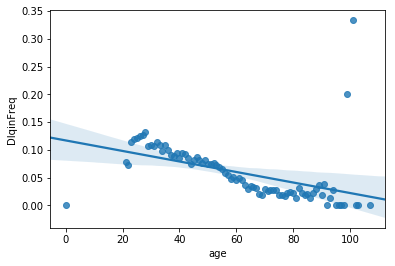

In [21]:
grouped_df = train_df.groupby('age')
dlinq_age = grouped_df['SeriousDlqin2yrs'].aggregate([np.mean,'count']).reset_index()
print(dlinq_age)
dlinq_age.columns =['age','DlqinFreq','count']
sns.regplot(x='age',y='DlqinFreq',data=dlinq_age)
plt.show()


From the plot above, we can see:
* DlinFreq is negatively associated with age in general
* age of 0,99 and 101 looks like outliers
* DlinFreq looks like a quardratic function of age. Put a higher order of age maybe helpful

Remove outlier in age and create new feature $age^2$

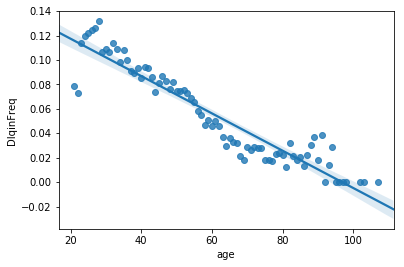

In [22]:
## remove outlier
train_df = train_df[train_df['age'] != 0]
train_df = train_df[train_df['age'] !=99]
train_df = train_df[train_df['age'] !=101]
grouped_df = train_df.groupby('age')
dlinq_age = grouped_df['SeriousDlqin2yrs'].aggregate([np.mean,'count']).reset_index()
dlinq_age.columns =['age','DlqinFreq','count']
sns.regplot(x='age',y='DlqinFreq',data=dlinq_age)
plt.show()

## create new features
train_df['age_sqr'] = train_df['age'].values^2 
## apply the same operation on testing set
test_df['age_sqr'] = test_df['age'].values^2

Split training data into 5 fold. Run xgboost and plot feature importance

In [23]:
train_y = train_df['SeriousDlqin2yrs']
#'RevolvingUtilizationOfUnsecuredLines'
train_X = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
test_X = test_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
print(type(train_y))
skf = model_selection.StratifiedKFold(n_splits=5,random_state=100)
xgb_params = {
'eta':0.03,
'max_depth':4,
'sub_sample':0.9,
'colsample_bytree':0.5,
'objective':'binary:logistic',
'eval_metric':'auc',
'silent':0
}

print(train_X.shape)
print(train_X.columns)
print(test_X.shape)

<class 'pandas.core.series.Series'>
(146067, 18)
Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncome_Null', 'NoD_Null',
       'IncomePerPerson', 'NumOfPastDue', 'MonthlyDebt',
       'NumOfOpenCreditLines', 'MonthlyBalance', 'age_sqr'],
      dtype='object')
(101503, 16)


[0]	train-auc:0.812817	val-auc:0.810043
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.823345	val-auc:0.821208
[2]	train-auc:0.850152	val-auc:0.845294
[3]	train-auc:0.850522	val-auc:0.847108
[4]	train-auc:0.852437	val-auc:0.847798
[5]	train-auc:0.853223	val-auc:0.849059
[6]	train-auc:0.852595	val-auc:0.849137
[7]	train-auc:0.85507	val-auc:0.851113
[8]	train-auc:0.859396	val-auc:0.854883
[9]	train-auc:0.859787	val-auc:0.854722
[10]	train-auc:0.858595	val-auc:0.853962
[11]	train-auc:0.858017	val-auc:0.853337
[12]	train-auc:0.858364	val-auc:0.853146
[13]	train-auc:0.858799	val-auc:0.853287
[14]	train-auc:0.859887	val-auc:0.854318
[15]	train-auc:0.8604	val-auc:0.854751
[16]	train-auc:0.860534	val-auc:0.854917
[17]	train-auc:0.86049	val-auc:0.85508
[18]	train-auc:0.860405	val-auc:0.855263
[19]	train-auc:0.860244	val-auc:0.855143
[20]	train-auc:0.859728	val-auc:0.854367
[21]	train-auc:

[196]	train-auc:0.871041	val-auc:0.861124
[197]	train-auc:0.871092	val-auc:0.861146
[198]	train-auc:0.871151	val-auc:0.861163
[199]	train-auc:0.871224	val-auc:0.861231
[200]	train-auc:0.871274	val-auc:0.861264
[201]	train-auc:0.871335	val-auc:0.86131
[202]	train-auc:0.871385	val-auc:0.861322
[203]	train-auc:0.871454	val-auc:0.861326
[204]	train-auc:0.871495	val-auc:0.861331
[205]	train-auc:0.87154	val-auc:0.861364
[206]	train-auc:0.871608	val-auc:0.86139
[207]	train-auc:0.871648	val-auc:0.861388
[208]	train-auc:0.871681	val-auc:0.861422
[209]	train-auc:0.87174	val-auc:0.861432
[210]	train-auc:0.871792	val-auc:0.861455
[211]	train-auc:0.871882	val-auc:0.861476
[212]	train-auc:0.871958	val-auc:0.861499
[213]	train-auc:0.872013	val-auc:0.861527
[214]	train-auc:0.872077	val-auc:0.86153
[215]	train-auc:0.872128	val-auc:0.861572
[216]	train-auc:0.87217	val-auc:0.861568
[217]	train-auc:0.87221	val-auc:0.861582
[218]	train-auc:0.872263	val-auc:0.861594
[219]	train-auc:0.872304	val-auc:0.861605

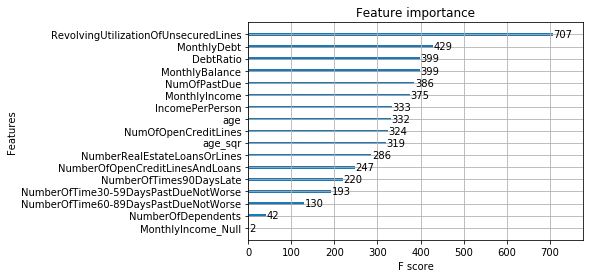

[0]	train-auc:0.818206	val-auc:0.81444
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.821651	val-auc:0.819504
[2]	train-auc:0.845786	val-auc:0.842739
[3]	train-auc:0.843884	val-auc:0.840385
[4]	train-auc:0.85078	val-auc:0.847521
[5]	train-auc:0.852256	val-auc:0.847944
[6]	train-auc:0.851157	val-auc:0.846979
[7]	train-auc:0.855012	val-auc:0.850635
[8]	train-auc:0.858932	val-auc:0.854222
[9]	train-auc:0.859242	val-auc:0.854155
[10]	train-auc:0.858337	val-auc:0.853393
[11]	train-auc:0.857874	val-auc:0.852793
[12]	train-auc:0.858239	val-auc:0.853041
[13]	train-auc:0.858674	val-auc:0.853548
[14]	train-auc:0.859541	val-auc:0.854668
[15]	train-auc:0.86018	val-auc:0.855593
[16]	train-auc:0.860223	val-auc:0.855275
[17]	train-auc:0.860119	val-auc:0.8551
[18]	train-auc:0.859953	val-auc:0.8548
[19]	train-auc:0.859674	val-auc:0.854351
[20]	train-auc:0.859372	val-auc:0.854091
[21]	train-auc:0.

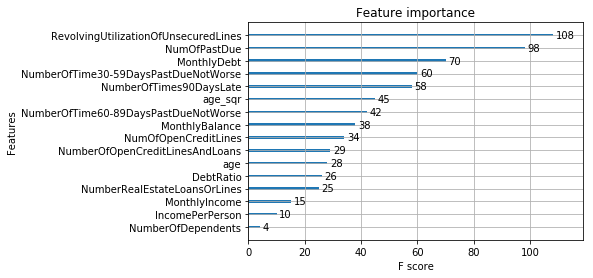

[0]	train-auc:0.812624	val-auc:0.810845
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.817235	val-auc:0.812497
[2]	train-auc:0.846773	val-auc:0.84438
[3]	train-auc:0.846466	val-auc:0.84502
[4]	train-auc:0.849255	val-auc:0.847186
[5]	train-auc:0.852137	val-auc:0.84943
[6]	train-auc:0.851838	val-auc:0.8493
[7]	train-auc:0.854518	val-auc:0.851847
[8]	train-auc:0.858225	val-auc:0.855089
[9]	train-auc:0.858369	val-auc:0.855051
[10]	train-auc:0.857301	val-auc:0.853749
[11]	train-auc:0.856926	val-auc:0.853682
[12]	train-auc:0.857198	val-auc:0.853709
[13]	train-auc:0.857555	val-auc:0.854498
[14]	train-auc:0.858845	val-auc:0.855782
[15]	train-auc:0.859591	val-auc:0.856303
[16]	train-auc:0.859674	val-auc:0.856462
[17]	train-auc:0.859466	val-auc:0.856129
[18]	train-auc:0.85927	val-auc:0.85606
[19]	train-auc:0.859041	val-auc:0.856115
[20]	train-auc:0.85866	val-auc:0.855494
[21]	train-auc:0.8

[196]	train-auc:0.870294	val-auc:0.863471
[197]	train-auc:0.870327	val-auc:0.863444
[198]	train-auc:0.87037	val-auc:0.863474
[199]	train-auc:0.870441	val-auc:0.863513
[200]	train-auc:0.870494	val-auc:0.863513
[201]	train-auc:0.870555	val-auc:0.86354
[202]	train-auc:0.870615	val-auc:0.863572
[203]	train-auc:0.870661	val-auc:0.863613
[204]	train-auc:0.870701	val-auc:0.863622
[205]	train-auc:0.870755	val-auc:0.863662
[206]	train-auc:0.870807	val-auc:0.863665
[207]	train-auc:0.870854	val-auc:0.863689
[208]	train-auc:0.870898	val-auc:0.863666
[209]	train-auc:0.870951	val-auc:0.863658
[210]	train-auc:0.871015	val-auc:0.863666
[211]	train-auc:0.871085	val-auc:0.863702
[212]	train-auc:0.871129	val-auc:0.86373
[213]	train-auc:0.871183	val-auc:0.863733
[214]	train-auc:0.871228	val-auc:0.863768
[215]	train-auc:0.871268	val-auc:0.86378
[216]	train-auc:0.871304	val-auc:0.863799
[217]	train-auc:0.87136	val-auc:0.863787
[218]	train-auc:0.871424	val-auc:0.863773
[219]	train-auc:0.871477	val-auc:0.8638

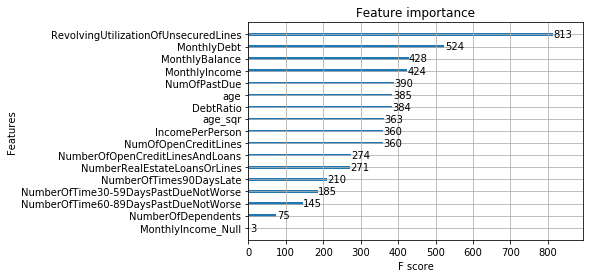

[0]	train-auc:0.814591	val-auc:0.805664
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.815614	val-auc:0.805984
[2]	train-auc:0.84272	val-auc:0.835372
[3]	train-auc:0.844697	val-auc:0.836772
[4]	train-auc:0.848391	val-auc:0.842718
[5]	train-auc:0.8519	val-auc:0.847051
[6]	train-auc:0.851014	val-auc:0.845613
[7]	train-auc:0.854534	val-auc:0.850037
[8]	train-auc:0.858393	val-auc:0.854725
[9]	train-auc:0.858631	val-auc:0.85501
[10]	train-auc:0.857836	val-auc:0.853994
[11]	train-auc:0.857408	val-auc:0.853544
[12]	train-auc:0.858255	val-auc:0.854418
[13]	train-auc:0.858305	val-auc:0.854651
[14]	train-auc:0.85866	val-auc:0.85495
[15]	train-auc:0.859351	val-auc:0.856026
[16]	train-auc:0.859431	val-auc:0.856142
[17]	train-auc:0.859425	val-auc:0.855798
[18]	train-auc:0.859322	val-auc:0.855717
[19]	train-auc:0.85931	val-auc:0.855762
[20]	train-auc:0.859083	val-auc:0.855508
[21]	train-auc:0.

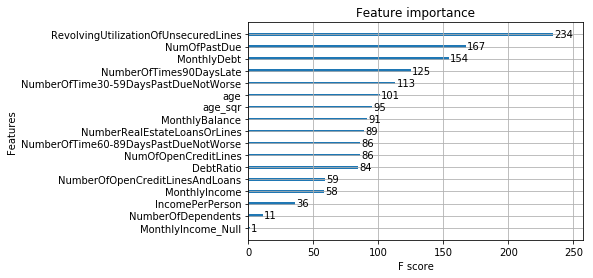

[0]	train-auc:0.809854	val-auc:0.821619
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.814364	val-auc:0.825362
[2]	train-auc:0.845888	val-auc:0.852807
[3]	train-auc:0.843779	val-auc:0.852398
[4]	train-auc:0.847864	val-auc:0.854376
[5]	train-auc:0.849654	val-auc:0.856155
[6]	train-auc:0.849497	val-auc:0.856105
[7]	train-auc:0.852149	val-auc:0.858205
[8]	train-auc:0.856579	val-auc:0.861535
[9]	train-auc:0.856804	val-auc:0.861634
[10]	train-auc:0.855722	val-auc:0.860985
[11]	train-auc:0.85551	val-auc:0.860913
[12]	train-auc:0.856192	val-auc:0.861299
[13]	train-auc:0.856859	val-auc:0.862222
[14]	train-auc:0.857494	val-auc:0.862671
[15]	train-auc:0.858189	val-auc:0.863323
[16]	train-auc:0.858242	val-auc:0.863378
[17]	train-auc:0.858159	val-auc:0.863262
[18]	train-auc:0.857959	val-auc:0.863229
[19]	train-auc:0.857936	val-auc:0.863305
[20]	train-auc:0.857522	val-auc:0.863175
[21]	train-

[196]	train-auc:0.869185	val-auc:0.87029
[197]	train-auc:0.869242	val-auc:0.870325
[198]	train-auc:0.869279	val-auc:0.870345
[199]	train-auc:0.869335	val-auc:0.870368
[200]	train-auc:0.869391	val-auc:0.870368
[201]	train-auc:0.869446	val-auc:0.870409
[202]	train-auc:0.869492	val-auc:0.870425
[203]	train-auc:0.869536	val-auc:0.870457
[204]	train-auc:0.869572	val-auc:0.870455
[205]	train-auc:0.869618	val-auc:0.870477
[206]	train-auc:0.869668	val-auc:0.870453
[207]	train-auc:0.869714	val-auc:0.870478
[208]	train-auc:0.869761	val-auc:0.870522
[209]	train-auc:0.869818	val-auc:0.870557
[210]	train-auc:0.86989	val-auc:0.870586
[211]	train-auc:0.869961	val-auc:0.870612
[212]	train-auc:0.870009	val-auc:0.870597
[213]	train-auc:0.87006	val-auc:0.870621
[214]	train-auc:0.870129	val-auc:0.870602
[215]	train-auc:0.870189	val-auc:0.870634
[216]	train-auc:0.870227	val-auc:0.870632
[217]	train-auc:0.870271	val-auc:0.870631
[218]	train-auc:0.870322	val-auc:0.870638
[219]	train-auc:0.870364	val-auc:0.87

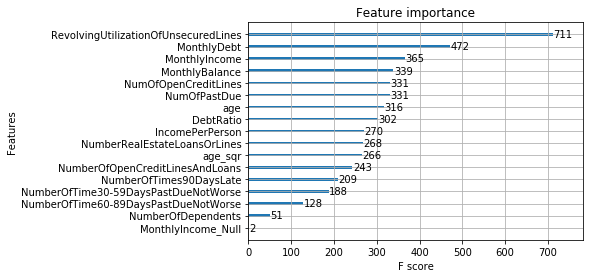

In [24]:
best_iteration =[]
best_score= []
training_score = []
for train_ind,val_ind in skf.split(train_X,train_y):
    #print (set(train_y))
    #print (type(train_y))
    X_train,X_val = train_X.iloc[train_ind,],train_X.iloc[val_ind,]
    y_train,y_val = train_y.iloc[train_ind],train_y.iloc[val_ind]
    #print (set(train_y))
    #print (max(train_ind),min(train_ind),max(val_ind),min(val_ind))
    #print (train_ind,val_ind)
    #print(set(y_train))
    dtrain = xgb.DMatrix(X_train,y_train,feature_names = X_train.columns)
    dval = xgb.DMatrix(X_val,y_val,feature_names = X_val.columns)
    model = xgb.train(xgb_params,dtrain,num_boost_round=1000,
                      evals=[(dtrain,'train'),(dval,'val')],verbose_eval=True,early_stopping_rounds=30)
    best_iteration.append(model.attributes()['best_iteration'])
    best_score.append(model.attributes()['best_score'])
    # training_score.append(model.attributes()['best_msg'].split()[1][-8:])
    xgb.plot_importance(model)
    plt.show()

In [25]:
try:
    train_X.drop(['MonthlyIncome_Null','NoD_Null'],axis=1,inplace=True)
    train_df.drop(['MonthlyIncome_Null','NoD_Null'],axis=1,inplace=True)
except ValueError:
    print ("These features have been dropped")

In [26]:
def xgbCV(eta=[0.05],max_depth=[6],sub_sample=[0.9],colsample_bytree=[0.9]):
    train_y = train_df['SeriousDlqin2yrs'] # label for training data
    train_X = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False) # feature for training data
    test_X = test_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False) # feature for testing data
    skf = model_selection.StratifiedKFold(n_splits=5,random_state=100) # stratified sampling
    train_performance ={} 
    val_performance={}
    for each_param in itertools.product(eta,max_depth,sub_sample,colsample_bytree): # iterative over each combination in parameter space
        xgb_params = {
                    'eta':each_param[0],
                    'max_depth':each_param[1],
                    'sub_sample':each_param[2],
                    'colsample_bytree':each_param[3],
                    'objective':'binary:logistic',
                    'eval_metric':'auc',
                    'silent':0
                    }
        best_iteration =[]
        best_score=[]
        training_score=[]
        for train_ind,val_ind in skf.split(train_X,train_y): # five fold stratified cross validation
            X_train,X_val = train_X.iloc[train_ind,],train_X.iloc[val_ind,] # train X and train y
            y_train,y_val = train_y.iloc[train_ind],train_y.iloc[val_ind] # validation X and validation y
            dtrain = xgb.DMatrix(X_train,y_train,feature_names = X_train.columns) # convert into DMatrix (xgb library data structure)
            dval = xgb.DMatrix(X_val,y_val,feature_names = X_val.columns) # convert into DMatrix (xgb library data structure)
            model = xgb.train(xgb_params,dtrain,num_boost_round=1000, 
                              evals=[(dtrain,'train'),(dval,'val')],verbose_eval=False,early_stopping_rounds=30) # train the model
            best_iteration.append(model.attributes()['best_iteration']) # best iteration regarding AUC in valid set
            best_score.append(model.attributes()['best_score']) # best score regarding AUC in valid set
            training_score.append(model.attributes()['best_msg'].split()[1][10:]) # best score regarding AUC in training set
        valid_mean = (np.asarray(best_score).astype(np.float).mean()) # mean AUC in valid set
        train_mean = (np.asarray(training_score).astype(np.float).mean()) # mean AUC in training set
        val_performance[each_param] =  train_mean
        train_performance[each_param] =  valid_mean
        print ("Parameters are {}. Training performance is {:.4f}. Validation performance is {:.4f}".format(each_param,train_mean,valid_mean))
    return (train_performance,val_performance)
#xgbCV(eta=[0.01,0.02,0.03,0.04,0.05],max_depth=[4,6,8,10],colsample_bytree=[0.3,0.5,0.7,0.9]) 
xgbCV(eta=[0.04],max_depth=[4],colsample_bytree=[0.5])

Parameters are (0.04, 4, 0.9, 0.5). Training performance is 0.8771. Validation performance is 0.8651


({(0.04, 4, 0.9, 0.5): 0.8651120000000001}, {(0.04, 4, 0.9, 0.5): 0.877095})

In [27]:
print(train_X.columns)
any(train_X.columns == test_X.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'IncomePerPerson', 'NumOfPastDue', 'MonthlyDebt',
       'NumOfOpenCreditLines', 'MonthlyBalance', 'age_sqr'],
      dtype='object')


True

In [28]:
train = xgb.DMatrix(train_X,train_y,feature_names=train_X.columns)
test = xgb.DMatrix(test_X,feature_names=test_X.columns)
xgb_params = {
                    'eta':0.03,
                    'max_depth':4,
                    'sub_sample':0.9,
                    'colsample_bytree':0.5,
                    'objective':'binary:logistic',
                    'eval_metric':'auc',
                    'silent':0
                    }

final_model = xgb.train(xgb_params,train,num_boost_round=500)
ypred = final_model.predict(test)


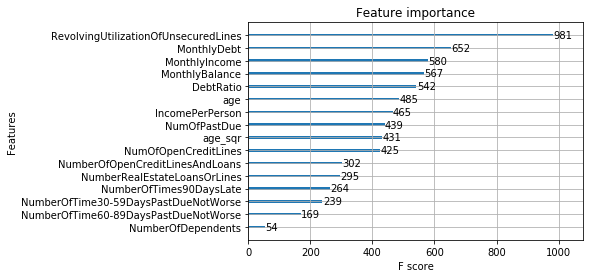

In [29]:
xgb.plot_importance(final_model)
plt.show()

In [31]:
yout = pd.DataFrame({'Id':test_df.ID.values,'Probability':ypred})
yout.to_csv('D:/csdn/credit/givemesomecredit/Kaggle-Competition-Give-Me-Some-Credit-master/xgboost_result1.csv',index=False)

In [32]:
yout.shape

(101503, 2)